# Project: Wrangling and Analyze Data

<a id="toc"></a>
## ToC
1. [Setting things up](#set_up)
2. [Data Gathering](#data_gathering)
  1. [archive data](#twitter_archive_enhanced)
  2. [image prediction](#image_predictions)
  3. [additional data](#tweet_json)
3. [Assessing Data](#assessing_data)
4. [The issues](#issues)
  1. [Quality issues](#quality_issues)
  2. [Tidiness issues](#tidiness_issues)
5. [Cleaning Data](#cleaning_data)
  1. [Quality issues](#cleaning_quality_issues)
    1. [in_reply_to_status_id is float](#in_reply_to_status_id)
    2. [in_reply_to_user_id is float](#in_reply_to_user_id)
    3. [timestamp is string](#timestamp)
    4. [retweeted_status_id is float](#retweeted_status_id)
    5. [retweeted_status_user_id is float](#retweeted_status_user_id)
    6. [retweeted_status_timestamp is string](#retweeted_status_timestamp)
    7. [tweet_id is int](#tweet_id)
    8. [id is int](#id_)
    9. [id_str is int](#id_str)
    10. [in_reply_to_status_id_2 is float](#in_reply_to_status_id_2)
    11. [in_reply_to_status_id_str is float](#in_reply_to_status_id_str)
    12. [in_reply_to_user_id_2 is float](#in_reply_to_user_id_2)
    13. [in_reply_to_user_id_str is float](#in_reply_to_user_id_str)
    14. [quoted_status_id is float](#quoted_status_id)
    15. [quoted_status_id_str is float](#quoted_status_id_str)
    16. [possibly_sensitive is always 0](#possibly_sensitive)
    17. [possibly_sensitive_appealable is always 0](#possibly_sensitive_appealable)
    18. [contributors has no values](#contributors)
    19. [coordinates has no values](#coordinates)
    20. [geo has no values](#geo)
    21. [4 records are not ratings](#not_ratings)
    22. [5 records with incorrect ratings](#incorrect_ratings)
    23. [1 duplicated record](#duplicated_record)
    24. [some of the data is retweets](#retweets)
  2. [Tidiness issues](#tidiness_quality_issues)
    1. [Nulls represented as None](#name_)
    2. [doggo, floofer, pupper, and puppo should be one column](#dog_stage)
    3. [in_reply_to_status_id_2 is redundant](#_in_reply_to_status_id_2)
    4. [in_reply_to_user_id_2 is redundant](#_in_reply_to_user_id_2)
    5. [source_2 is redundant](#_source_2)
    6. [id is redundant](#_id)
    7. [id_str is redundant](#_id_str)
    8. [in_reply_to_status_id_str is redundant](#_in_reply_to_status_id_str)
    9. [in_reply_to_user_id_str is redundant](#_in_reply_to_user_id_str)
    10. [quoted_status_id_str is redundant](#_quoted_status_id_str)
6. [Storing Data](#storing_data)
7. [Analyzing and Visualizing](#analyzing_visualizing)
  1. [Which are the most common ratings?](#common_ratings)
  2. [How often do the AI's agree with one another?](#a_i)
  3. [How often does the channel tweet?](#channel_tweets)
8. [Insights](#insights)
9. [Visualization](#visualization)

<a id="set_up"></a>
## Setting things up
[Back to ToC](#toc)

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1000)

#!pip install -U tweepy==4.0
import tweepy
#tweepy_key = "xxxxxx"
#tweepy_secret_key ="xxxxxx"
#tweepy_auth = tweepy.AppAuthHandler(tweepy_key, tweepy_secret_key)
#tweepy_api = tweepy.API(tweepy_auth, wait_on_rate_limit=True)

import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import os
import io

<a id="data_gathering"></a>
## Data Gathering
[Back to ToC](#toc)

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
<a id="twitter_archive_enhanced"></a>
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brandi and Harley. They are practicing their caroling for later. Both 12/10 festive af https://t.co/AbBDuGZUpp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060537683968/photo/1,12,10,Brandi,None,None,None,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",13,10,Zeke,None,None,None,None
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shakespeare. He appears to be maximum level pettable. Born with no eyes tho (tragic). 10/10 probably wise https://t.co/rA8WUVOLBr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353721753600/photo/1,10,10,Shakespeare,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ALL THE SPOTS ARE GREY DAMN IT CINDY"" ...10/10 https://t.co/uhQNehTpIu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889858887680/photo/1,10,10,None,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10 https://t.co/85q7xlplsJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798585110529/photo/1,5,10,Jerry,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Batdog. He's sleeping now but when he wakes up he'll fight crime and such. Great tongue. 11/10 for Batdog https://t.co/Clg16EVy9O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082306625538/photo/1,11,10,Batdog,None,None,None,None
2049,671504605491109889,NaN,NaN,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He was just informed that dogs can't be Jedi. 11/10 https://t.co/mGW5c50mPA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/671504605491109889/photo/1,https://twitter.com/dog_rates/status/671504605491109889/photo/1",11,10,Charlie,None,None,None,None
122,869227993411051520,NaN,NaN,2017-05-29 16:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gizmo. His favorite thing is standing pupright like a hooman. Sneaky tongue slip status achieved. 13/10 would boop well https://t.co/IoR3n1fi

<a id="image_predictions"></a>
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#just to make sure i dont have 2 diffrent names due to some typo (this is used 2 times)
LOCAL_FILENAME = 'image-predictions.tsv'

#try fetch file from the web
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
if r.status_code<300:
    #make backup incase the file is no longer avilable in the future
    with open(LOCAL_FILENAME, 'wb') as f:
        f.write(r.content)
    #load data to dataframe. i assume this is faster then making another hard dirve call
    info = io.StringIO(r.content.decode(r.encoding))
    df_predictions = pd.read_csv(info, sep='\t')
else:
    #if request failed, try backup
    df_predictions = pd.read_csv(LOCAL_FILENAME, sep='\t')

df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
859,696894894812565505,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,1,Appenzeller,0.665628,True,beagle,0.104795,True,Greater_Swiss_Mountain_dog,0.067868,True
979,707297311098011648,https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg,1,Blenheim_spaniel,0.370717,True,Shih-Tzu,0.201566,True,black-footed_ferret,0.101559,False
992,708109389455101952,https://pbs.twimg.com/media/CdO1u9vWAAApj2V.jpg,1,Staffordshire_bullterrier,0.516106,True,American_Staffordshire_terrier,0.236075,True,kelpie,0.069750,True
1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
159,668892474547511297,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,1,kelpie,0.421979,True,collie,0.227060,True,Cardigan,0.168211,True
1753,824663926340194305,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,1,English_setter,0.526488,True,golden_retriever,0.402815,True,Irish_setter,0.034418,True
1462,778383385161035776,https://pbs.twimg.com/media/Cs1fjyqWIAE2jop.jpg,1,collie,0.345266,True,borzoi,0.312823,True,Border_collie,0.213011,True
1522,788070120937619456,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
92,667546741521195010,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True


<a id="tweet_json"></a>
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
def print_cls(msg, cls):
    print(" " * cls, end="\r")
    print(msg, end="\r")
    return len(msg)

def read_tweets(tweet_ids, save_to, echo_failures=True):
    tweet_count = len(tweet_ids)
    tweet_pos = 0
    cls = 0
    failed_ids = {}
    with open(save_to, 'w') as outfile:
        for tweet_id in tweet_ids:
            tweet_pos += 1
            p = np.round(tweet_pos/tweet_count*100, 2)
            cls = print_cls(str(tweet_id) + " (" + str(tweet_pos) + "/" + str(tweet_count) + ", " + str(p) + "%)", cls)
            try:
                tweet = tweepy_api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except Exception as e:
                failed_ids[tweet_id] = e
                if echo_failures:
                    cls = print_cls("", cls)
                    print(str(tweet_id) + " - Failure")
    cls = print_cls("Done!", cls)
    return failed_ids

fn = 'tweet_json.txt'
if not os.path.exists(fn):
    fails = read_tweets(df_archive.tweet_id.values, fn)
    with open('tweet_errors.tsv', 'w') as errfile:
        errfile.write('tweet_id' + '\t' + 'error' + '\t' + 'msg' + '\n')
        for tweet_id, error_msg in fails.items():
            errfile.write(str(tweet_id) + '\t' + str(error_msg).replace('\n','\t') + '\n')

fails = pd.read_csv('tweet_errors.tsv', sep='\t')
df_json = pd.read_json('tweet_json.txt', lines=True)
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32945,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6886,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9374533, 'friends_count': 20, 'listed_count': 7831, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147489, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17466, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/imag..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6

<a id="assessing_data"></a>
## Assessing Data
[Back to ToC](#toc)

In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [7]:
# I would rather have it as 2 tables, split predictions by AI 1, 2 & 3, add AI_NUM field and union them...
# Oh well, since you asked for just one file:
df_all = pd.merge(df_archive, df_predictions, left_on='tweet_id', right_on='tweet_id', how='left')
df_all = pd.merge(df_all, df_json, left_on='tweet_id', right_on='id', how='left', suffixes=('', '_2'))

In [8]:
df_all.info()
df_all.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id            78 non-null float64
in_reply_to_user_id              78 non-null float64
timestamp                        2356 non-null object
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                            23

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id_2,in_reply_to_status_id_str,in_reply_to_user_id_2,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,0.0,0.0,2325.000000,0.0,2.325000e+03,2.325000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2193.0,2193.0,2.600000e+01,2.600000e+01,2325.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,NaN,NaN,6881.092043,NaN,7.416926e+17,7.416926e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2428.836559
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,NaN,NaN,10688.331300,NaN,6.814903e+16,6.814903e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4111.187764
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,NaN,NaN,1197.000000,NaN,6.780233e+17,6.780233e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,489.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,NaN,NaN,2983.000000,NaN,7.177900e+17,7.177900e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1129.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,NaN,NaN,8412.000000,NaN,7.986285e+17,7.986285e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,2811.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,NaN,NaN,141860.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,69485.000000


In [9]:
df = df_all[df_archive['rating_denominator']!=10][['tweet_id','text','rating_numerator','rating_denominator']]
#check for posts with more then one /
df[df['text'].str.replace('https?://[^ ]*','').str.contains('[0-9]/.*/[0-9]')]
#to delete:
#835246439529840640 - its a comment on a rating not a rating
#832088576586297345 - not a rating
#775096608509886464 - duplicated and deleted from tweeter
#the others should be fixed

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [10]:
df = df[~df['text'].str.replace('https?://[^ ]*','').str.contains('[0-9]/.*/[0-9]')]
#WeRateDogs seem to always give a denominator divisible by 10
df[df['text'].str.replace('https?://[^ ]*','').str.contains('/[0-9]*[1-9][^0-9]')]

,tweet_id,text,rating_numerator,rating_denominator
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
1663,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16


In [11]:
len(df_archive[~df_archive['tweet_id'].isin(df_predictions['tweet_id'])])

281

In [12]:
df_archive['name'].value_counts().head()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Name: name, dtype: int64

In [13]:
df = pd.DataFrame()

In [14]:
df = df_all[['in_reply_to_status_id','in_reply_to_status_id_2']][df_all['in_reply_to_status_id']!=df_all['in_reply_to_status_id_2']]
len(df[df['in_reply_to_status_id_2'].notnull()])==0

True

In [15]:
df = df_all[['in_reply_to_user_id','in_reply_to_user_id_2']][df_all['in_reply_to_user_id']!=df_all['in_reply_to_user_id_2']]
len(df[df['in_reply_to_user_id_2'].notnull()])==0

True

In [16]:
df = df_all[['source','source_2']][df_all['source']!=df_all['source_2']]
len(df[df['source_2'].notnull()])==0

True

In [17]:
df_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
df_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [19]:
df_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [20]:
df_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

<a id="issues"></a>
## The issues
[Back to ToC](#toc)

<a id="quality_issues"></a>
### Quality issues
1. **in_reply_to_status_id** is *float* instead of string
2. **in_reply_to_user_id** is *float* instead of string
3. **timestamp** is *string* instead of datetime
4. **retweeted_status_id** is *float* instead of string
5. **retweeted_status_user_id** is *float* instead of string
6. **retweeted_status_timestamp** is *string* instead of datetime
7. **tweet_id** is *int* instead of string
8. **id** is *int* instead of string
9. **id_str** is *int* instead of string
10. **in_reply_to_status_id_2** is *float* instead of string
11. **in_reply_to_status_id_str** is *float* instead of string
12. **in_reply_to_user_id_2** is *float* instead of string
13. **in_reply_to_user_id_str** is *float* instead of string
14. **quoted_status_id** is *float* instead of string
15. **quoted_status_id_str** is *float* instead of string
16. **possibly_sensitive** is always 0
17. **possibly_sensitive_appealable** is always 0
18. **contributors** has no values
19. **coordinates** has no values
20. **geo** has no values
21. 4 records are not ratings
22. 5 records with incorrect ratings
23. 1 duplicated record
24. some of the data is retweets, which we don't want

<a id="tidiness_issues"></a>
### Tidiness issues
1. Nulls represented as *None* in **name** in ***archive***
2. **doggo**, **floofer**, **pupper**, and **puppo** ahould be one column: *dog_stage*
3. **in_reply_to_status_id_2** is redundant
4. **in_reply_to_user_id_2** is redundant
5. **source_2** is redundant
6. **id** is redundant
7. **id_str** is redundant
8. **in_reply_to_status_id_str** is redundant
9. **in_reply_to_user_id_str** is redundant
10. **quoted_status_id_str** is redundant

<a id="cleaning_data"></a>
## Cleaning Data
[Back to ToC](#toc)

In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original data
df_all_clean = df_all.copy()

<a id="cleaning_quality_issues"></a>
<a id="in_reply_to_status_id"></a>
### Quality issue 1. **in_reply_to_status_id** is *float* instead of string:
[Back to ToC](#toc)

#### Define:
Change in_reply_to_status_id to string

#### Code

In [22]:
df_all_clean['in_reply_to_status_id'] = df_all_clean['in_reply_to_status_id'].astype("str")
df_all_clean['in_reply_to_status_id'].replace('nan', np.nan, inplace=True)

#### Test

In [23]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null float64
timestamp                        2356 non-null object
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                            235

<a id="in_reply_to_user_id"></a>
### Quality issue 2. **in_reply_to_user_id** is *float* instead of string:
[Back to ToC](#toc)

#### Define
Change in_reply_to_user_id to string

#### Code

In [24]:
df_all_clean['in_reply_to_user_id'] = df_all_clean['in_reply_to_user_id'].astype("str")
df_all_clean['in_reply_to_user_id'].replace('nan', np.nan, inplace=True)

#### Test

In [25]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null object
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                            2356

<a id="timestamp"></a>
### Quality issue 3. **timestamp** is *string* instead of datetime:
[Back to ToC](#toc)

#### Define
Change timestamp to datetime

#### Code

In [26]:
df_all_clean['timestamp'] = pd.to_datetime(df_all_clean['timestamp'])

#### Test

In [27]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                        

<a id="retweeted_status_id"></a>
### Quality issue 4. **retweeted_status_id** is *float* instead of string:
[Back to ToC](#toc)

#### Define
Change retweeted_status_id to string

#### Code

In [28]:
df_all_clean['retweeted_status_id'] = df_all_clean['retweeted_status_id'].astype("str")
df_all_clean['retweeted_status_id'].replace('nan', np.nan, inplace=True)

#### Test

In [29]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                         

<a id="retweeted_status_user_id"></a>
### Quality issue 5. **retweeted_status_user_id** is *float* instead of string:
[Back to ToC](#toc)

#### Define
Change retweeted_status_user_id to string

#### Code

In [30]:
df_all_clean['retweeted_status_user_id'] = df_all_clean['retweeted_status_user_id'].astype("str")
df_all_clean['retweeted_status_user_id'].replace('nan', np.nan, inplace=True)

#### Test

In [31]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                          

<a id="retweeted_status_timestamp"></a>
### Quality issue 6. **retweeted_status_timestamp** is *string* instead of datetime:
[Back to ToC](#toc)

#### Define
Change retweeted_status_timestamp to datetime

#### Code

In [32]:
df_all_clean['retweeted_status_timestamp'] = pd.to_datetime(df_all_clean['retweeted_status_timestamp'])

#### Test

In [33]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                  

<a id="tweet_id"></a>
### Quality issue 7. **tweet_id** is *int* instead of string
[Back to ToC](#toc)

#### Define
Change tweet_id to string in both tables

#### Code

In [34]:
df_all_clean['tweet_id'] = df_all_clean['tweet_id'].astype("str")

#### Test

In [35]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="id_"></a>
### Quality issue 8. id is int instead of string
[Back to ToC](#toc)

#### Define
Change id to string

#### Code

In [36]:
df_all_clean['id'] = df_all_clean['id'].astype("str")
df_all_clean['id'].replace('nan', np.nan, inplace=True)

#### Test

In [37]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="id_str"></a>
### Quality issue 9. id_str is int instead of string
[Back to ToC](#toc)

#### Define
Change id_str to string

#### Code

In [38]:
df_all_clean['id_str'] = df_all_clean['id_str'].astype("str")
df_all_clean['id_str'].replace('nan', np.nan, inplace=True)

#### Test

In [39]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="in_reply_to_status_id_2"></a>
### Quality issue 10. in_reply_to_status_id_2 is float instead of string
[Back to ToC](#toc)

#### Define
Change in_reply_to_status_id_2 to string

#### Code

In [40]:
df_all_clean['in_reply_to_status_id_2'] = df_all_clean['in_reply_to_status_id_2'].astype("str")
df_all_clean['in_reply_to_status_id_2'].replace('nan', np.nan, inplace=True)

#### Test

In [41]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="in_reply_to_status_id_str"></a>
### Quality issue 11. in_reply_to_status_id_str is float instead of string
[Back to ToC](#toc)

#### Define
Change in_reply_to_status_id_str to string

#### Code

In [42]:
df_all_clean['in_reply_to_status_id_str'] = df_all_clean['in_reply_to_status_id_str'].astype("str")
df_all_clean['in_reply_to_status_id_str'].replace('nan', np.nan, inplace=True)

#### Test

In [43]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="in_reply_to_user_id_2"></a>
### Quality issue 12. in_reply_to_user_id_2 is float instead of string
[Back to ToC](#toc)

#### Define
Change in_reply_to_user_id_2 to string

#### Code

In [44]:
df_all_clean['in_reply_to_user_id_2'] = df_all_clean['in_reply_to_user_id_2'].astype("str")
df_all_clean['in_reply_to_user_id_2'].replace('nan', np.nan, inplace=True)

#### Test

In [45]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="in_reply_to_user_id_str"></a>
### Quality issue 13. in_reply_to_user_id_str is float instead of string
[Back to ToC](#toc)

#### Define
Change  in_reply_to_user_id_str to string

#### Code

In [46]:
df_all_clean['in_reply_to_user_id_str'] = df_all_clean['in_reply_to_user_id_str'].astype("str")
df_all_clean['in_reply_to_user_id_str'].replace('nan', np.nan, inplace=True)

#### Test

In [47]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="quoted_status_id"></a>
### Quality issue 14. quoted_status_id is float instead of string
[Back to ToC](#toc)

#### Define
Change quoted_status_id to string

#### Code

In [48]:
df_all_clean['quoted_status_id'] = df_all_clean['quoted_status_id'].astype("str")
df_all_clean['quoted_status_id'].replace('nan', np.nan, inplace=True)

#### Test

In [49]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="quoted_status_id_str"></a>
### Quality issue 15. quoted_status_id_str is float instead of string
[Back to ToC](#toc)

#### Define
Change quoted_status_id_str to string

#### Code

In [50]:
df_all_clean['quoted_status_id_str'] = df_all_clean['quoted_status_id_str'].astype("str")
df_all_clean['quoted_status_id_str'].replace('nan', np.nan, inplace=True)

#### Test

In [51]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_user_id              78 non-null object
timestamp                        2356 non-null datetime64[ns]
source                           2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null object
retweeted_status_user_id         181 non-null object
retweeted_status_timestamp       181 non-null datetime64[ns]
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                 

<a id="possibly_sensitive"></a>
### Quality issue 16. possibly_sensitive is always 0
[Back to ToC](#toc)

#### Define
Delete possibly_sensitive column

#### Code

In [52]:
to_delete = 'possibly_sensitive'
df_all_clean = df_all_clean.drop('possibly_sensitive', axis=1)

#### Test

In [53]:
to_delete in df_all_clean.columns

False

<a id="possibly_sensitive_appealable"></a>
### Quality issue 17. possibly_sensitive_appealable is always 0
[Back to ToC](#toc)

#### Define
Delete possibly_sensitive_appealable column

#### Code

In [54]:
to_delete = 'possibly_sensitive_appealable'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [55]:
to_delete in df_all_clean.columns

False

<a id="contributors"></a>
### Quality issue 18. contributors has no values
[Back to ToC](#toc)

#### Define
Delete contributors column

#### Code

In [56]:
to_delete = 'contributors'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [57]:
to_delete in df_all_clean.columns

False

<a id="coordinates"></a>
### Quality issue 19. coordinates has no values
[Back to ToC](#toc)

#### Define
Delete coordinates column

#### Code

In [58]:
to_delete = 'coordinates'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [59]:
to_delete in df_all_clean.columns

False

<a id="geo"></a>
### Quality issue 20. geo has no values
[Back to ToC](#toc)

#### Define
Delete geo column

#### Code

In [60]:
to_delete = 'geo'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [61]:
to_delete in df_all_clean.columns

False

<a id="not_ratings"></a>
### Quality issue 21. 4 records are not ratings
[Back to ToC](#toc)

#### Define
Delete tweets 835246439529840640, 832088576586297345, 810984652412424192, and 682808988178739200

#### Code

In [62]:
to_delete = ['835246439529840640', '832088576586297345', '810984652412424192', '682808988178739200']
df_all_clean = df_all_clean.drop(df_all_clean[df_all_clean['tweet_id'].isin(to_delete)].index)

#### Test

In [63]:
len(df_all_clean[df_all_clean['tweet_id'].isin(to_delete)]) == 0

True

<a id="incorrect_ratings"></a>
### Quality issue 22. 5 records with incorrect ratings
[Back to ToC](#toc)

#### Define
Records with more then one / (ignoring any links) need to ignore the first

#### Code

In [64]:
df_all_clean[['fixed_rating_numerator','fixed_rating_denominator']] = df_all_clean['text'].str.replace('https?://[^ ]*','').str.extract('[0-9]*/[0-9]*[^0-9]+([0-9]*)/([0-9]*)')
df_all_clean['fixed_rating_numerator'].fillna(df_all_clean['rating_numerator'], inplace=True)
df_all_clean['fixed_rating_denominator'].fillna(df_all_clean['rating_denominator'], inplace=True)

#### Test

In [65]:
df = df_all_clean[['tweet_id','text','rating_numerator','rating_denominator','fixed_rating_numerator','fixed_rating_denominator']]
df.head()

,tweet_id,text,rating_numerator,rating_denominator,fixed_rating_numerator,fixed_rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,13,10
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,13,10
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,12,10


In [66]:
df = df[df['rating_denominator']!=10]
df[df['text'].str.replace('https?://[^ ]*','').str.contains('[0-9]/.*/[0-9]')]

,tweet_id,text,rating_numerator,rating_denominator,fixed_rating_numerator,fixed_rating_denominator
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,14,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,14,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,13,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2,9,10


<a id="duplicated_record"></a>
### Quality issue 23. 1 duplicated record
[Back to ToC](#toc)

#### Define
Delete tweet 775096608509886464

#### Code

In [67]:
to_delete = ['775096608509886464']
df_all_clean = df_all_clean.drop(df_all_clean[df_all_clean['tweet_id'].isin(to_delete)].index)

#### Test

In [68]:
len(df_all_clean[df_all_clean['tweet_id'].isin(to_delete)]) == 0

True

<a id="retweets"></a>
### Quality issue 24. some of the data is retweets
[Back to ToC](#toc)

#### Define
Delete retweets

#### Code

In [69]:
org_len = len(df_all_clean)
df_all_clean = df_all_clean.drop(df_all_clean[df_all_clean['retweeted_status_id'].notnull()].index)
df_all_clean = df_all_clean.drop(df_all_clean[df_all_clean['retweeted_status_user_id'].notnull()].index)
df_all_clean = df_all_clean.drop(df_all_clean[df_all_clean['retweeted_status_timestamp'].notnull()].index)
df_all_clean = df_all_clean.drop('retweeted_status_id', axis=1)
df_all_clean = df_all_clean.drop('retweeted_status_user_id', axis=1)
df_all_clean = df_all_clean.drop('retweeted_status_timestamp', axis=1)

#### Test

In [70]:
org_len-len(df_all_clean)

180

<a id="tidiness_quality_issues"></a>
<a id="name_"></a>
### Tidiness issue 1. Nulls represented as *None* in **name** in ***archive***:
[Back to ToC](#toc)

#### Define
Replace 'None' with Nan

#### Code

In [71]:
df_all_clean['name'].replace('None', np.nan, inplace=True)

#### Test

In [72]:
'None' in df_all_clean['name'].values

False

<a id="dog_stage"></a>
### Tidiness issue 2. **doggo**, **floofer**, **pupper**, and **puppo** should be one column: *dog_stage*
[Back to ToC](#toc)

#### Define
Convert doggo to boolean

#### Code

In [73]:
df_all_clean['doggo'] = df_all_clean['doggo'].replace("None","")
df_all_clean['floofer'] = df_all_clean['floofer'].replace("None","")
df_all_clean['pupper'] = df_all_clean['pupper'].replace("None","")
df_all_clean['puppo'] = df_all_clean['puppo'].replace("None","")
df_all_clean['dog_stage'] = "<>" + df_all_clean['doggo'] + "<>" + df_all_clean['floofer'] + "<>" + df_all_clean['pupper'] + "<>" + df_all_clean['puppo'] + "<>"
#I love this trick, it replaces N subsequent repeats of the substring '<>' with just one occurrence
#then I just need to trim and replace it with comma
df_all_clean['dog_stage'] = df_all_clean['dog_stage'].str.replace("><","").str[2:-2].str.replace("<>",", ")
df_all_clean['dog_stage'] = df_all_clean['dog_stage'].replace("", np.nan)
df_all_clean = df_all_clean.drop('doggo', axis=1)
df_all_clean = df_all_clean.drop('floofer', axis=1)
df_all_clean = df_all_clean.drop('pupper', axis=1)
df_all_clean = df_all_clean.drop('puppo', axis=1)

#### Test

In [74]:
df_all_clean['dog_stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

<a id="_in_reply_to_status_id_2"></a>
### Tidiness issue 3. **in_reply_to_status_id_2** is redundant
[Back to ToC](#toc)

#### Define
Delete column in_reply_to_status_id_2

#### Code

In [75]:
to_delete = 'in_reply_to_status_id_2'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [76]:
to_delete in df_all_clean.columns

False

<a id="_in_reply_to_user_id_2"></a>
### Tidiness issue 4. **in_reply_to_user_id_2** is redundant
[Back to ToC](#toc)

#### Define
Delete column in_reply_to_user_id_2

#### Code

In [77]:
to_delete = 'in_reply_to_user_id_2'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [78]:
to_delete in df_all_clean.columns

False

<a id="_source_2"></a>
### Tidiness issue 5. **source_2** is redundant
[Back to ToC](#toc)

#### Define
Delete column source_2

#### Code

In [79]:
to_delete = 'source_2'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [80]:
to_delete in df_all_clean.columns

False

<a id="_id"></a>
### Tidiness issue 6. **id** is redundant
[Back to ToC](#toc)

#### Define
Delete column id

#### Code

In [81]:
to_delete = 'id'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [82]:
to_delete in df_all_clean.columns

False

<a id="_id_str"></a>
### Tidiness issue 7. **id_str** is redundant
[Back to ToC](#toc)

#### Define
Delete column id_str

#### Code

In [83]:
to_delete = 'id_str'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [84]:
to_delete in df_all_clean.columns

False

<a id="_in_reply_to_status_id_str"></a>
### Tidiness issue 8. **in_reply_to_status_id_str** is redundant
[Back to ToC](#toc)

#### Define
Delete column in_reply_to_status_id_str

#### Code

In [85]:
to_delete = 'in_reply_to_status_id_str'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [86]:
to_delete in df_all_clean.columns

False

<a id="_in_reply_to_user_id_str"></a>
### Tidiness issue 9. **in_reply_to_user_id_str** is redundant
[Back to ToC](#toc)

#### Define
Delete column in_reply_to_user_id_str

#### Code

In [87]:
to_delete = 'in_reply_to_user_id_str'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [88]:
to_delete in df_all_clean.columns

False

<a id="_quoted_status_id_str"></a>
### Tidiness issue 10. **quoted_status_id_str** is redundant
[Back to ToC](#toc)

#### Define
Delete column quoted_status_id_str

#### Code

In [89]:
to_delete = 'quoted_status_id_str'
df_all_clean = df_all_clean.drop(to_delete, axis=1)

#### Test

In [90]:
to_delete in df_all_clean.columns

False

<a id="storing_data"></a>
## Storing Data
[Back to ToC](#toc)

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
df_all_clean.to_csv("twitter_archive_master.csv", index=False)

<a id="analyzing_visualizing"></a>
## Analyzing and Visualizing Data
[Back to ToC](#toc)

In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

<a id="common_ratings"></a>
##### Which are the most common ratings?

In [92]:
df_head = df_all_clean.rating_numerator.value_counts().head()
print(df_head)
p = df_head.values.sum()/len(df_all_clean)
'Which is '+str(p*100)[:5]+'% of total in the first '+str(len(df_head))+' rows'

12    500
10    442
11    425
13    307
9     156
Name: rating_numerator, dtype: int64


'Which is 84.29% of total in the first 5 rows'

<a id="a_i"></a>
##### How often do the AI's agree with one another?

In [93]:
df = df_all_clean
except3 = df[df['p1'] == df['p2']]
except2 = df[df['p1'] == df['p3']]
except1 = df[df['p2'] == df['p3']]
print([len(except3),len(except2),len(except1)])
except3

[1, 0, 0]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,in_reply_to_screen_name,is_quote_status,lang,place,quoted_status,quoted_status_id,quoted_status_permalink,retweet_count,retweeted,retweeted_status,truncated,user,fixed_rating_numerator,fixed_rating_denominator,dog_stage
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV,https://twitter.com/dog_rates/status/770414278348247044/photo/1,11,10,Al,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1.0,maillot,0.580528,False,maillot,0.081449,False,golden_retriever,0.05357,True,2016-08-30 00:14:12,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 770414268261011456, 'id_str': '770414268261011456', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg', 'url': 'https://t.co/OUwWbEKOUV', 'display_url': 'pic.twitter.com/OUwWbEKOUV', 'expanded_url': 'https://twitter.com/dog_rates/status/770414278348247044/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 446, 'resize': 'fit'}, 'large': {'w': 1276, 'h': 837, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 787, 'resize': 'fit'}}}]}","{'media': [{'id': 770414268261011456, 'id_str': '770414268261011456', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg', 'url': 'https://t.co/OUwWbEKOUV', 'display_url': 'pic.twitter.com/OUwWbEKOUV', 'expanded_url': 'https://twitter.com/dog_rates/status/770414278348247044/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 446, 'resize': 'fit'}, 'large': {'w': 1276, 'h': 837, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 787, 'resize': 'fit'}}}]}",5790.0,False,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV,None,False,en,None,NaN,NaN,NaN,1896.0,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9374535, 'friends_count': 20, 'listed_count': 7831, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147489, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17466, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/imag...",11,10,NaN


<a id="insights"></a>
### Insights:
[Back to ToC](#toc)
1. Most of the ratings between 10 and 13.
2. There is only one time that 2 or more AI's agreed on something, and even then they were wrong.
3. The channel started with a lot of tweets before settling down, maybe it helped the channel grow when it was new?

<a id="visualization"></a>
### Visualization
[Back to ToC](#toc)

<a id="channel_tweets"></a>
##### How often does the channel tweet?

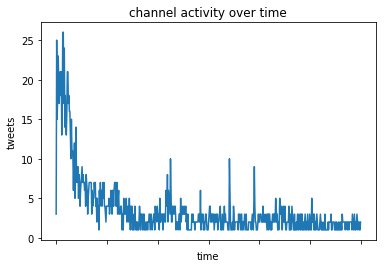

In [96]:
#channel activity over time
df_all_clean.timestamp.astype('str').str[:10].value_counts().sort_index().plot()
plt.title("channel activity over time")
plt.xlabel("time")
plt.ylabel("tweets")
plt.show()